<a href="https://colab.research.google.com/github/hamagami/anomaly-detection/blob/main/04_05_oneclassSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# one class SVM による時系列異常検知

### 必要なモジュールのimport

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM

In [2]:
!wget https://dl.dropbox.com/s/x3fmb9mxr4xkip3/qtdbsel102.txt

--2020-12-11 14:06:51--  https://dl.dropbox.com/s/x3fmb9mxr4xkip3/qtdbsel102.txt
Resolving dl.dropbox.com (dl.dropbox.com)... 162.125.82.15, 2620:100:6032:15::a27d:520f
Connecting to dl.dropbox.com (dl.dropbox.com)|162.125.82.15|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.dropboxusercontent.com/s/x3fmb9mxr4xkip3/qtdbsel102.txt [following]
--2020-12-11 14:06:52--  https://dl.dropboxusercontent.com/s/x3fmb9mxr4xkip3/qtdbsel102.txt
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.82.15, 2620:100:6032:15::a27d:520f
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.82.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1125000 (1.1M) [text/plain]
Saving to: ‘qtdbsel102.txt’

qtdbsel102.txt      100%[===================>]   1.07M  6.71MB/s    in 0.2s    

2020-12-11 14:06:52 (6.71 MB/s) - ‘qtdbsel102.txt’ saved [1125000/1125000]



### セグメントの切り出し関数

In [3]:
def segdata(lst, dim):
    emb = np.empty((0,dim), float)
    for i in range(lst.size - dim + 1):
        tmp = np.array(lst[i:i+dim])[::-1].reshape((1,-1)) #セグメントの切り出し，時系列反転，appendのための2次ベクトル化
        emb = np.append( emb, tmp, axis=0)
    return emb

### データ読み込み，パラメータ設定
 Keoghらの心電図のデータ  http://www.cs.ucr.edu/~eamonn/discords/qtdbsel102.txt
 Keogh, E., Lin, J. and Fu, A.: HOT SAX : Efficiently Finding the Most Unusual Time Series Subsequence, in Proceedings of the Fifth IEEE International Conference on Data Mining, ICDM 05, pp.226-233.

In [4]:
LEN=3000  #分析区間
WLEN=150 #セグメントのサイズ
SP=0         #学習用データの開始点
AP=3000   #テスト用データの開始点　個のデータの場合 4250ポイント付近に異常がある

In [5]:
data = np.loadtxt("qtdbsel102.txt",delimiter="\t")
print("データ数:",data.shape[0],"  次元数:",data.shape[1])

#元データは3次元の時系列，3次のデータ(indexとしては2)を指定して学習/テストデータに分割
train_org = data[SP:SP+LEN*10, 2]      #学習用データとして 1～2999サンプル区間を使用

データ数: 45000   次元数: 3


### 窓関数の設定と切り出し

In [7]:
seglen = WLEN   #Window size
#winlenの単位で1ポイントずつずらした2次元表現に変換
train = segdata(train_org, seglen)
test_org  = data[AP:AP+LEN, 2]  #テスト用データとして3000～5999サンプルを使用
test =  segdata(test_org, seglen)


### one class SVMによる判定

In [8]:
clf = OneClassSVM(nu=0.001, kernel='rbf', gamma='auto')
clf.fit(train)
pred = clf.predict(test)

### 波形と OCSVMの判定結果を並べて表示

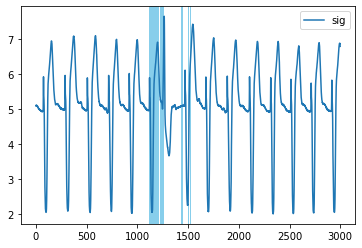

In [11]:
plt.plot(test_org, label="sig")
plt.legend()
outlier_rows = [i for i in range(len(pred)) if pred[i]<0]
for c in outlier_rows:
    plt.axvspan(c, c, color = "skyblue")
plt.show()
plt.show()